# Classification on the CIFAR-10 dataset with scikit-learn
by [Zahra Taheri](https://github.com/zahta) (5 June 2020)

### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

## Loading CIFAR-10

In [2]:
%run load_cifar10.py

In [3]:
cifar_10_dir = 'cifar-10-batches-py'
train_data, train_filenames, train_labels, test_data, test_filenames, test_labels, label_names = \
load_cifar_10_data(cifar_10_dir)
print("Train data: ", train_data.shape)
print("Train filenames: ", train_filenames.shape)
print("Train labels: ", train_labels.shape)
print("Test data: ", test_data.shape)
print("Test filenames: ", test_filenames.shape)
print("Test labels: ", test_labels.shape)
print("Label names: ", label_names.shape)

Train data:  (50000, 32, 32, 3)
Train filenames:  (50000,)
Train labels:  (50000,)
Test data:  (10000, 32, 32, 3)
Test filenames:  (10000,)
Test labels:  (10000,)
Label names:  (10,)


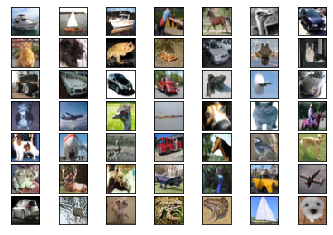

In [4]:
# display some random training images
num_plot = 7
f, ax = plt.subplots(num_plot, num_plot)
for m in range(num_plot):
    for n in range(num_plot):
        idx = np.random.randint(0, train_data.shape[0])
        ax[m, n].imshow(train_data[idx])
        ax[m, n].get_xaxis().set_visible(False)
        ax[m, n].get_yaxis().set_visible(False)
f.subplots_adjust(hspace=0.1)
f.subplots_adjust(wspace=0)
plt.show()

## Preparation of the dataset

In [5]:
X_train,X_test,y_train,y_test=train_data,test_data,train_labels,test_labels
X_train.shape

(50000, 32, 32, 3)

In [6]:
nsamples, a,b,c = X_train.shape
X_train= X_train.reshape((nsamples,a*b*c))
nsamples, a,b,c = X_test.shape
X_test= X_test.reshape((nsamples,a*b*c))

In [7]:
X_train.shape

(50000, 3072)

In [8]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler()
X_train = std_scale.fit_transform(X_train)
X_test = std_scale.fit_transform(X_test)

#minmax_scale = preprocessing.MinMaxScaler()
#X_train = minmax_scale.fit_transform(X_train)
#X_test = minmax_scale.fit_transform(X_test)

## Select and train models

##### Decision Tree Classifier, SGD Classifier, Random Forrests Classifier and Voting Classifier

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

tree_clf = DecisionTreeClassifier(max_depth=10, random_state=42)
sgd_clf = SGDClassifier(max_iter=15, tol=-np.infty,loss='hinge', random_state=42)
rf_clf = RandomForestClassifier(max_depth=10,n_estimators=20, random_state=42)

In [10]:
vot_h_clf = VotingClassifier(
    estimators=[('dt',tree_clf),('rf', rf_clf)],
    voting='hard')

In [11]:
from sklearn.metrics import accuracy_score

for clf in (tree_clf, sgd_clf, rf_clf, vot_h_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.3052
SGDClassifier 0.396
RandomForestClassifier 0.41
VotingClassifier 0.3534


In [13]:
#from sklearn.svm import SVC
#svm_clf = SVC(probability=True, random_state=42)

vot_s_clf = VotingClassifier(
     estimators=[('dt',tree_clf),('rf', rf_clf)],
    voting='soft')

vot_s_clf.fit(X_train, y_train)
y_pred = vot_s_clf.predict(X_test)

print(vot_s_clf.__class__.__name__, accuracy_score(y_test, y_pred))

VotingClassifier 0.3523


#### Bagging Classifier

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_depth=10, random_state=42), n_estimators=20,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(bag_clf.__class__.__name__, accuracy_score(y_test, y_pred))

BaggingClassifier 0.2485


#### Random Forrests Classifier and Extra Trees Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

rf_clf = RandomForestClassifier(max_depth=12,n_estimators=20, random_state=42)

extra_trees_clf = ExtraTreesClassifier(max_depth=12,n_estimators=20, random_state=42)

estimators = [rf_clf, extra_trees_clf]

for clf in estimators:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.4181
ExtraTreesClassifier 0.414


#### AdaBoost Classifier

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=10), n_estimators=20,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
    
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
print(ada_clf.__class__.__name__, accuracy_score(y_test, y_pred))

AdaBoostClassifier 0.3162


##  With Principal Component Analysis (PCA)

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [10]:
X_train.shape

(50000, 221)

#### Logistic Regression Classifier and Multi-layer Perceptron Classifier

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score

log_clf = LogisticRegression(solver="liblinear", random_state=42)
mlp_clf = MLPClassifier(max_iter=1000, random_state=42)

estimators = [log_clf,mlp_clf]

for clf in estimators:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.4071
MLPClassifier 0.4781


#### SVM Classifier

In [10]:
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

svm_clf = SVC(random_state=42)

svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
print(svm_clf.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.5466


#### AdaBoost Classifier

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=10), n_estimators=20,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
    
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
print(ada_clf.__class__.__name__, accuracy_score(y_test, y_pred))

AdaBoostClassifier 0.2822


#### XGBoost Classifier

In [9]:
from xgboost import XGBClassifier

xgb_clf=XGBClassifier(n_estimators=20, max_depth=10, random_state=42,objective='multi:softmax')
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

from sklearn.metrics import accuracy_score

print(xgb_clf.__class__.__name__, accuracy_score(y_test, y_pred))

XGBClassifier 0.4777


# Results 

**The system specifications used in these classifications are as follows:**
- System Model: HP Pavilion 15 Notebook PC
- Operating System: Windows 10 Pro 64-bit
- Processor: Intel(R) Core(TM) i7-4500U CPU @ 1.80GHz (4 CPUs), ~2.4GHz
- Memory: 8192MB RAM

| Classifiers                    | Accuracy |
|--------------------------------|----------|
| Bagging Classifier             | 0.2485   |
| AdaBoost Classifier (with PCA) | 0.2822   |
| Decision Tree Classifier       | 0.3052   |
| AdaBoost Classifier            | 0.3162   |
| Voting Classifier (soft)       | 0.3523   |
| Voting Classifier (hard)       | 0.3534   |
| SGD Classifier                 | 0.396    |
| Logistic Regression (with PCA) | 0.4071   |
| Extra Trees Classifier         | 0.414    |
| Random Forest Classifier       | 0.4181   |
| XGBoost Classifier (with PCA)  | 0.4777   |
| MLP Classifier (with PCA)      | 0.4781   |
| SVM Classifier (with PCA)      | 0.5466   |